# Лабораторная работа 4
# Правильный многоугольник Рело. Векторизация вычислений в numpy

Шпак Андрей Валерьевич, 26.07.2022

# Определения и свойства

$\textbf{Треугольник Рело}$ представляет собой область пересечения трех кругов радуса $r$ с центрами в вершинах равностороннего треугольника с длиной $r$.

$\textbf{Правильный}$ $n$ $\textbf{-угольник Рело}$ представляет собой область пересечения $n$ кругов радуса $r$ с центрами в вершинах правильного $n$-угольника с $\textit{нечетным числом}$ сторон длины $l$. Радиус круга $r$ согласован с длиной стороны $l$ правильного многоугольника таким образом, чтобы окружность радиуса $r$ проходила через две соседние вершины правильного n-угольника. Многоугольник должен иметь нечетное число сторон, потому что у каждой вершины должно быть две противоположные вершины, соединенные дугой окружности.

Правильный многоугольник Рело и круг являются примерами $\textbf{фигур постоянной ширины}$. Для фигуры постоянной ширины можно построить пары параллельных опорных прямых, которые касаются фигуры, но не пересекают ее, и, независимо от выбора пары опорных прямых, расстояние между прямыми будет всегда одинаковым.

Расстояние между опорными прямыми называется $\textbf{шириной фигуры}$. Ширина правильного многоугольника Рело равна радиусу $r$ пересекающихся кругов. Ширина круга равна диаметру круга. Среди всех фигур постоянной ширины треугольник Рело имеет наименьшую площадь, круг имеет наибольшую площадь.

# Задание 4.1 (Правильный многоугольник Рело)

$\color{red}{Напишите}$ пользовательскую функцию $\textbf{regular_polygon_Relo(n, center, r, N)}$, которая возвращает матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело.

Аргументы пользовательской функции имеют следующий смысл:

- $\textbf{n}$: количество вершин правильного многоугольника Рело; является нечетным целым числом большим $2$; стандартное значение $n = 3$
- $\textbf{center}$: массив координат центра правильного многоугольника Рело; стандартнное значение $center = np.array([0, 0])$;
- $\textbf{r}$: ширина правильного многоугольника Рело; является положительным числом; стандартное значение $r = 1$;
- $\textbf{N}$: количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом; стандартное значение $N = 100$.

# Реализация задания 4.1

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Этап 1. Построение треугольника Рело

### 1. Определение переменных

In [3]:
n = 3 # количество вершин треугольника Рело
center = np.array([0, 0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

### 2. Вычисление координат вершин правильного треугольника

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус $R$ окружности, описанной вокруг правильного $n$-угольника с длиной стороны $l$, вычисляется по формуле
$$R = \dfrac{l}{2 \sin \pi / n}$$
Длина стороны $l$ правильного треугольника, на котором будем строить треугольник Рело, совпадает с шириной треугольника Рело $r$

In [4]:
l = r # равенство справедливо только для треугольника Рело

Вычислим радиус $R$ описанной окружности

In [5]:
R = l / (2 * math.sin(math.pi / n))

Введем прямоугольную декартову систему координат. Построим матрицу с координатами вершин правильного треугольника. Центр треуголника размещаем в точке $center$, радиус описанной окружности полагаем равным $R$

In [6]:
t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
# ВОПРОС: в чем смысл разбиения промежутка [0, 2 * pi)?
# ОТВЕТ: смысл разбиения промежутка [0, 2 * pi) в том, что около этого самого треугольника описана окружность
# и я ищу точки этого треугольника на окружности
# треугольник правильный, поэтому разбиваю тригонометрический круг на равные части
print(t)
# эквиваленты такому разбиению - это
# [0, 2 * pi / 3, 4 * pi / 3]
# сам искал!

# обращаю внимание на векторизацию вычислений с массивами без использования циклов

# ВОПРОС: в чем смысл нахождения cos(t) и sin(t)?
# ОТВЕТ: смысл нахождения cos(t) и sin(t) в том, что так я узнаю координаты точек - вершин треугольника
# перед этим я нашел радианные меры углов
# можно на листике отметить эти углы на тригонометрической окружности как точки
# теперь нетрудно вывести координаты этих точек с помощью sin и cos, опустив перпендикуляры и радиус r = c:
# (c * cos(beta); c * sin(beta))
# beta - острый угол между радиусом и осью, нетружно доказать, что cos(острого угла beta) = cos(тупого угла)
print(np.cos(t))
print(np.sin(t))

# ВОПРОС: в чем математический смысл следующей строчки?
# ОТВЕТ:математический смысл следующей строчки в том, что
# я транспонирую матрицу, состоящую из двух строк:
# косинусы точек (углов) и синусы точек (углов)
# таким образом получаю координаты каждой точки, но не совсем
# чтобы получить именно координаты, умножаю на радиус описанной окружности
# и просто прибавляю координаты центра, то есть сдвигаю в нужное место, вот и все

vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
vertices

[0.        2.0943951 4.1887902]
[ 1.  -0.5 -0.5]
[ 0.         0.8660254 -0.8660254]


array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

(-3.3197640478403514, 6.206515393788478, -5.499999999999999, 5.500000000000001)

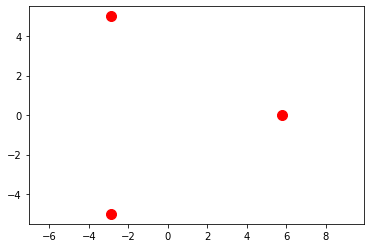

In [7]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize = 20)
plt.axis('equal')
# changes limits of x or y axis so that equal increments of x and y have the same length; a circle is circular
# для корректного отображения

### 3. Представление одной стороны треугольника Рело

Обозначим через $\alpha$ центральный угол, соответствующий стороне правильного $n$-угольника. Тогда
$$\alpha = 2 \pi / n.$$
Обозначим через $\beta$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника. Тогда
$$\beta = \alpha / 2.$$
Построим матрицу с координатами точек, описывающих сторону треугольника Рело относительно вершины vertices[0]. Сторона представляет собой дугу окружности радиуса $r$ с центром в точке vertices[0] и значением угла $\left[ \pi - \beta / 2, \pi + \beta / 2 \right]$.

Вычислим значения введенных величин

In [8]:
# ВОПРОС: почему берется именно такое значение угла?
# НЕУВЕРЕННЫЙ ОТВЕТ: потому что
# можно было взять [2 * pi - beta / 2 ; 2 * pi + beta / 2]
# можно еще какой-то
alpha = 2 * math.pi / n
beta = alpha / 2

Введем вспомогательную последовательность значений угла для построения координат точек стороны треугольника Рело

In [9]:
angle = np.linspace(-beta / 2, beta / 2, N)
# возвращает равномерно распределенные числа в течение заданного интервала
# ВОПРОС: почему не np.arange?
# ОТВЕТ: так удобней по синтаксису, так как есть известное число точек N
# а еще когда мы используем аргументы с плавающей запятой в np.arange, это может привести к потере точности, 
# что может вызвать непредсказуемый результат

Строим матрицу с координатами точек первой стороны

In [10]:
# обращаю внимание на векторизацию вычислений с массивами без использования циклов
side0 = vertices[0] + r * np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)])

(-4.726350454318064, 6.273495698858845, -5.499999999999999, 5.500000000000001)

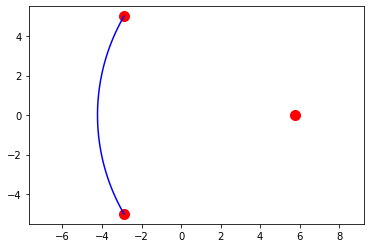

In [11]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize=20)
plt.plot(side0[:,0], side0[:,1], 'b-', markersize=20)
plt.axis('equal')

Построим матрицу с координатами точек, описывающих сторону треугольника Рело относительно второй вершины vertices[1]. Сторона представляет собой дугу окружности радиуса $r$ с центром в точке vertices[1] и значением угла $\left[ \pi + \alpha - \beta / 2, \pi + \alpha + \beta / 2 \right]$

In [12]:
# обращаю внимание на векторизацию вычислений с массивами без использования циклов
side1 = vertices[1] + r * np.transpose([np.cos(angle + np.pi + alpha), np.sin(angle + np.pi + alpha)])

(-4.726350454318064, 6.273495698858845, -5.499999999999999, 5.500000000000001)

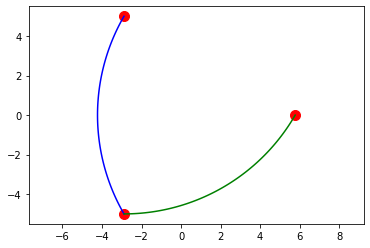

In [13]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize=20)
plt.plot(side0[:,0], side0[:,1], 'b-', markersize=20)
plt.plot(side1[:,0], side1[:,1], 'g-', markersize=20)
plt.axis('equal')

### 4. Моделирование границы треугольника Рело

Создадим список из матриц, каждая их которых содержит координаты точек одной из сторон треугольника Рело

In [14]:
# обращаю внимание на векторизацию вычислений с массивами без использования циклов
list_sides = [vertices[i] + r * np.transpose([np.cos(angle + np.pi + i * alpha), np.sin(angle + np.pi + i * alpha)]) for i in range(n)]

С помощью фунции $\textbf{concatenate}$ из расширения numpy объединим массивы для каждой из сторон в единый массив sides

In [15]:
sides = np.concatenate(list_sides)

(-4.726350454318064, 6.273495698858846, -5.499999999999999, 5.500000000000001)

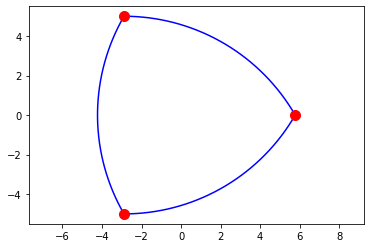

In [16]:
plt.plot(sides[:,0], sides[:,1], 'b-', markersize=20)
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize=20)
plt.axis('equal')

## Этап 2. Построение правильного многоугольника Рело

Следуя аналогичным рассуждениям из Этапа 1, $\color{red}{создайте}$ матричное описание границы правильного многоугольника Рело для произвольных значений переменных n, center, r, N.

$\color{red}{Внимание}$: длина стороны $l$ правильного многоугольника, на основании которого строится многоугольник Рело, является неизвестной величиной и должна быть выражена через количество вершин $n$ и ширину $r$ многоугольника Рело.

$\color{red}{Напигите}$ подробно, как получена аналитическая зависимость $l$ от $n$ и $r$. Объяснения оформите в тексте документа с лабораторной работой.

In [21]:
n = 5 # количество правильного многоугольника Рело
center = np.array([3, 3]) # координаты центра правильного многоугольника Рело
r = 15. # ширина правильного многоугольника Рело
N = 100 # количество точек для описания стороны правильного многоугольника Рело

In [22]:
alpha = 2 * math.pi / n
beta = alpha / 2

Так как $r$ согласован с $l$ таким образом, чтобы окружность радиуса $r$ проходила через две соседние вершины, можно построить равнобедренный треугольник 
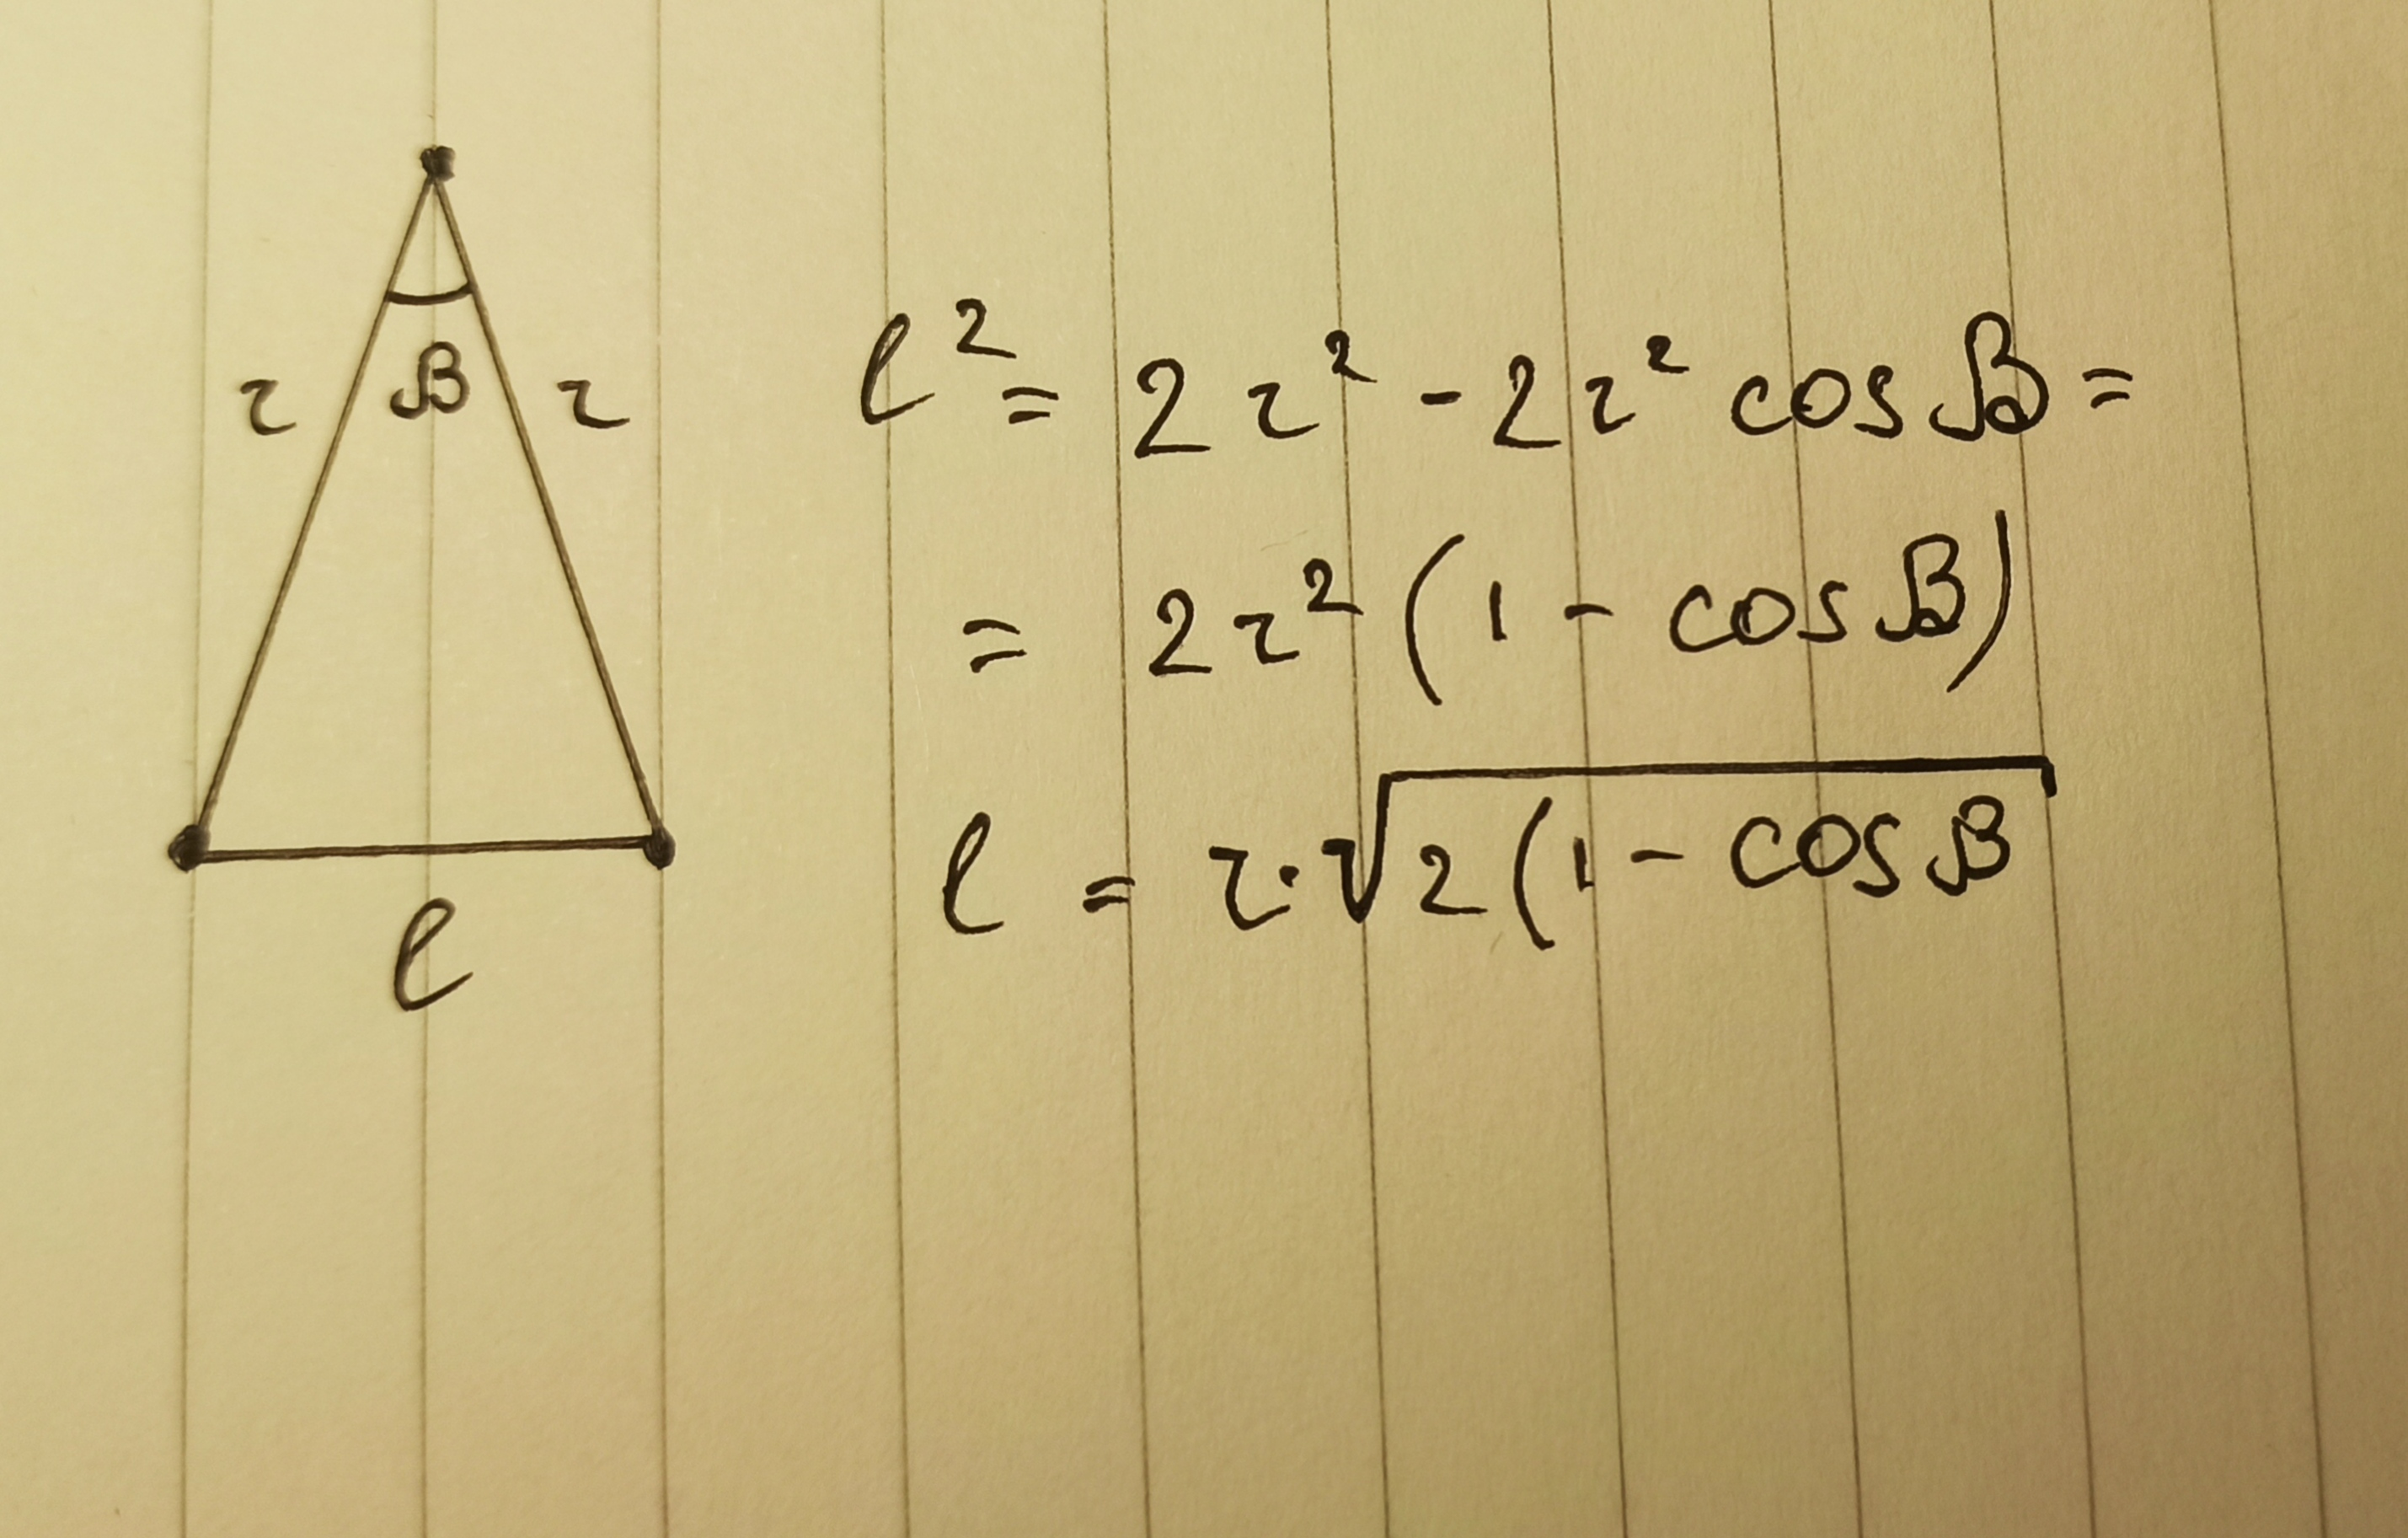
$r$ - боковые строны, $l$ - основание треугольника, $\beta$ &mdash; центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника. По теореме косинусов вывожу формулу:
$$l^2 = 2 r^2 - 2 r^2 cos \beta$$
$$l = r \sqrt{2 \left( 1 - \cos \beta \right)}$$

In [23]:
l = r * math.sqrt(2 * (1 - math.cos(beta)))

In [24]:
R = l / (2 * math.sin(math.pi / n))

In [25]:
t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
vertices

array([[10.88596668,  3.        ],
       [ 5.43689772, 10.5       ],
       [-3.37988106,  7.63525492],
       [-3.37988106, -1.63525492],
       [ 5.43689772, -4.5       ]])

(-4.0931734498616645, 11.599259069008369, -5.25, 11.25)

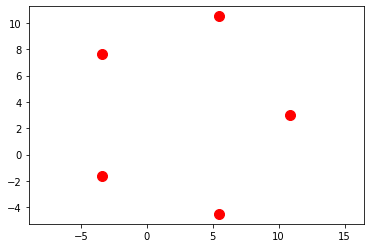

In [26]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize=20)
plt.axis('equal')

In [27]:
angle = np.linspace(-beta / 2, beta / 2, N)

In [28]:
sides = [vertices[i] + r * np.transpose([np.cos(angle + np.pi + i * alpha), np.sin(angle + np.pi + i * alpha)]) for i in range(n)]
sides = np.concatenate(sides)

(-4.863954017050425, 11.635962905541168, -5.250000000000001, 11.25)

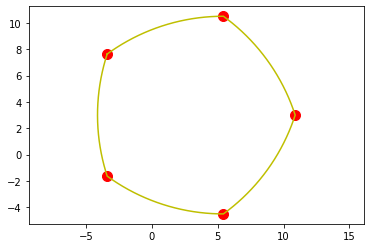

In [29]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize=20)
plt.plot(sides[:,0], sides[:,1], 'y-')
plt.axis('equal')

(-7.742777420883191,
 14.257166063849766,
 -8.000000000000002,
 14.000000000000002)

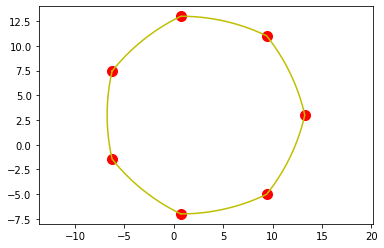

In [30]:
n = 7 # количество вершин правильного многоугольника Рело
center = np.array([3, 3]) # координаты центра правильного многоугольника Рело
r = 20. # ширина правильного многоугольника Рело
N = 100 # количество точек для описания стороны правильного многоугольника Рело

alpha = 2 * math.pi / n
beta = alpha / 2

l = r * math.sqrt(2 * (1 - math.cos(beta)))

R = l / (2 * math.sin(math.pi / n))

t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
vertices

angle = np.linspace(-beta / 2, beta / 2, N)

sides = [vertices[i] + r * np.transpose([np.cos(angle + np.pi + i * alpha), np.sin(angle + np.pi + i * alpha)]) for i in range(n)]
sides = np.concatenate(sides)

plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize=20)
plt.plot(sides[:,0], sides[:,1], 'y-')
plt.axis('equal')

(-7.9449054560357055,
 14.055082236190932,
 -8.000000000000014,
 14.000000000000016)

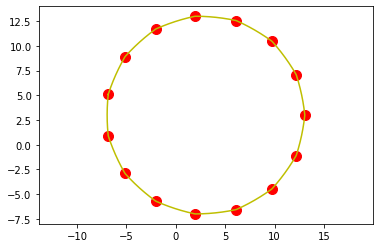

In [31]:
n = 15 # количество вершин правильного многоугольника Рело
center = np.array([3, 3]) # координаты центра правильного многоугольника Рело
r = 20. # ширина правильного многоугольника Рело
N = 100 # количество точек для описания стороны правильного многоугольника Рело

alpha = 2 * math.pi / n
beta = alpha / 2

l = r * math.sqrt(2 * (1 - math.cos(beta)))

R = l / (2 * math.sin(math.pi / n))

t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
vertices

angle = np.linspace(-beta / 2, beta / 2, N)

sides = [vertices[i] + r * np.transpose([np.cos(angle + np.pi + i * alpha), np.sin(angle + np.pi + i * alpha)]) for i in range(n)]
sides = np.concatenate(sides)

plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize=20)
plt.plot(sides[:,0], sides[:,1], 'y-')
plt.axis('equal')

## Этап 3. Результирующая пользовательская функция

$\color{red}{Напишите}$ результирующую пользовательскую функцию regular_polygon_Relo(n, center, r, N) на основании кода из Этапа 2.

Для функции regular_polygon_Relo $\color{red}{напишите}$ строки документации.

$\color{red}{Протестируйте}$ функцию regular_polygon_Relo для различных значений аргументов в предположении, что корректность вводимых данных не гарантируется.

$\color{red}{Постройте}$ в одной системе координат правильные многоугольники Рело для различного количества вершин и различных положений центров. При этом $\color{red}{Вызывайте}$ функцию regular_polygon_Relo с различными способами указания позиционных и ключевых аргументов.

$\color{red}{Создайте}$ модуль relo.py, в котором будет содержаться пользовательская функция regular_polygon_Relo.

### Комментарии

Оператор $\textbf{assert}$ может использоваться для контроля за передаваемыми значеними аргументов при вызове функции. Оператор $\textbf{assert}$ генерирует исключение по условию. Например,

In [32]:
def f(r):
    assert r > 0, 'radius r should be positive'
    return None

Если условие $r > 0$ истинно, то код, следующий за оператором $\textbf{assert}$, выполняется

In [33]:
f(1)

Если условие $r > 0$ ложно, то оператор $\textbf{assert}$ генерирует исключение $\textbf{AssertionError}$, прерывает процесс выполнения кода и выдает сообщение об ошибке с использованием строкового объекта, указанного при вызове оператора $\textbf{assert}$

In [34]:
f(0)

AssertionError: radius r should be positive

(-1.4179491924311227, 1.8820508075688775, -1.65, 1.6500000000000004)

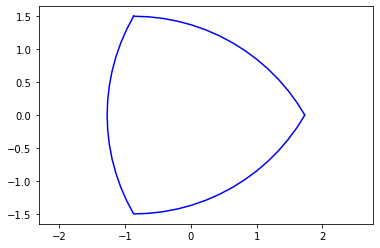

In [35]:
def regular_polygon_Relo(n=3, center=np.array([0, 0]), r=1, N=100):    
    """возвращает матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело
    
    Arguments:
    
    n: количество вершин правильного многоугольника Рело; является нечетным целым числом большим  2 ; стандартное значение n = 3;
    center: массив координат центра правильного многоугольника Рело; стандартнное значение center = np.array([0, 0]);
    r: ширина правильного многоугольника Рело; является положительным числом; стандартное значение r = 1;
    N: количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом; стандартное значение N = 100.
    
    Returns: ([[x1, y1], [x2, y2], ...])
    """
    
    assert n > 2, 'number of vertices n should be positive and greater than 2'
    assert n % 2, 'number of vertices n should be odd'
    assert r > 0, 'radius r should be positive'
    assert N > 0, 'number of points N should be positive'
    
    alpha = 2 * math.pi / n
    beta = alpha / 2
    
    l = r * math.sqrt(2 * (1 - math.cos(beta)))
    R = l / (2 * math.sin(math.pi / n))
    
    t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
    vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
    
    angle = np.linspace(-beta / 2, beta / 2, N)
    
    sides = [vertices[i] + r * np.transpose([np.cos(angle + np.pi + i * alpha), np.sin(angle + np.pi + i * alpha)]) for i in range(n)]
    sides = np.concatenate(sides)
    
    return sides

poly_1 = regular_polygon_Relo(3, np.array([0, 0]), 3, 15)
plt.plot(poly_1[:,0], poly_1[:,1], 'b-')
plt.axis('equal')

In [36]:
help(regular_polygon_Relo)

Help on function regular_polygon_Relo in module __main__:

regular_polygon_Relo(n=3, center=array([0, 0]), r=1, N=100)
    возвращает матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело
    
    Arguments:
    
    n: количество вершин правильного многоугольника Рело; является нечетным целым числом большим  2 ; стандартное значение n = 3;
    center: массив координат центра правильного многоугольника Рело; стандартнное значение center = np.array([0, 0]);
    r: ширина правильного многоугольника Рело; является положительным числом; стандартное значение r = 1;
    N: количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом; стандартное значение N = 100.
    
    Returns: ([[x1, y1], [x2, y2], ...])



(-0.47263504543180657, 0.6273495698858846, -0.55, 0.5500000000000002)

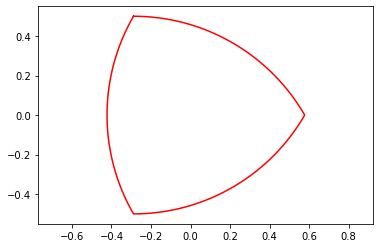

In [37]:
poly_2 = regular_polygon_Relo()
plt.plot(poly_2[:,0], poly_2[:,1], 'r-')
plt.axis('equal')

(-15.114247050911693, 17.885752949088307, -25.5, 7.5000000000000036)

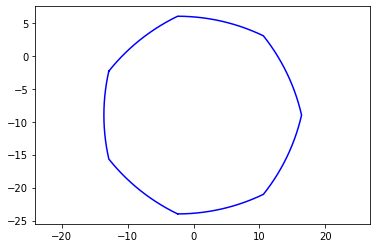

In [38]:
poly_3 = regular_polygon_Relo(7, np.array([1, -9]), 30, 15)
plt.plot(poly_3[:,0], poly_3[:,1], 'b-')
plt.axis('equal')

(-0.524263601136695, 0.5757308603694112, -0.5500000000000002, 0.55)

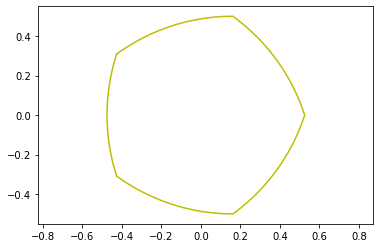

In [39]:
poly_4 = regular_polygon_Relo(5)
plt.plot(poly_4[:,0], poly_4[:,1], 'y-')
plt.axis('equal')

(0.45771493765498295, 1.557713228242296, 0.4499999999999996, 1.55)

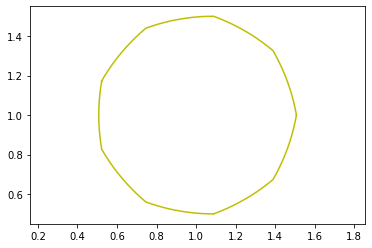

In [40]:
poly_6 = regular_polygon_Relo(9, np.array([1, 1]))
plt.plot(poly_6[:,0], poly_6[:,1], 'y-')
plt.axis('equal')

(-9.380210710573188, 11.519773722642896, -9.45, 11.449999999999994)

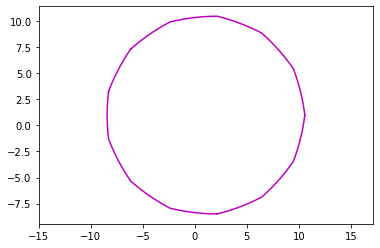

In [41]:
poly_7 = regular_polygon_Relo(13, np.array([1, 1]), 19)
plt.plot(poly_7[:,0], poly_7[:,1], 'm-')
plt.axis('equal')

In [42]:
# тестирую, когда n < 0
poly_8 = regular_polygon_Relo(-13, np.array([1, 1]), 19)

AssertionError: number of vertices n should be positive and greater than 2

In [43]:
# тестирую, когда n = 2
poly_8 = regular_polygon_Relo(2, np.array([1, 1]))

AssertionError: number of vertices n should be positive and greater than 2

In [44]:
# тестирую, когда n четное
poly_8 = regular_polygon_Relo(6)

AssertionError: number of vertices n should be odd

In [45]:
# тестирую, когда r отрицательный
poly_8 = regular_polygon_Relo(113, np.array([0, -100]), -11)

AssertionError: radius r should be positive

In [46]:
# тестирую, когда r = 0
poly_8 = regular_polygon_Relo(3, np.array([9, 5]), 0)

AssertionError: radius r should be positive

In [47]:
# тестирую, когда N = 0
poly_8 = regular_polygon_Relo(3, np.array([9, 5]), 14, 0)

AssertionError: number of points N should be positive

In [48]:
# тестирую, когда N < 0
poly_8 = regular_polygon_Relo(3, np.array([9, 5]), 14, -999999)

AssertionError: number of points N should be positive

(-5.498008843217865, 6.064126920533912, -5.625000000000007, 8.125000000000002)

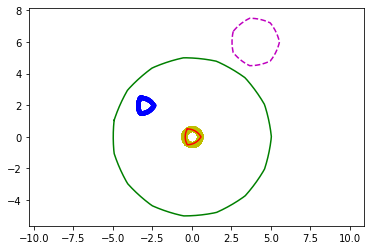

In [49]:
# три аргумента
poly_1 = regular_polygon_Relo(7, np.array([4, 6]), 3)
plt.plot(poly_1[:,0], poly_1[:,1], 'm--')
# два аргумента
poly_2 = regular_polygon_Relo(3, np.array([-3, 2]))
plt.plot(poly_2[:,0], poly_2[:,1], 'b.')
# один аргумент
poly_3 = regular_polygon_Relo(17)
plt.plot(poly_3[:,0], poly_3[:,1], 'y*')
# без аргументов
poly_4 = regular_polygon_Relo()
plt.plot(poly_4[:,0], poly_4[:,1], 'r-')
# четыре аргумента
poly_5 = regular_polygon_Relo(15, np.array([0, 0]), 10, 200)
plt.plot(poly_5[:,0], poly_5[:,1], 'g-')
plt.axis('equal')

In [50]:
# мой модуль
import relo_polygon

(-0.47263504543180657, 0.6273495698858846, -0.55, 0.5500000000000002)

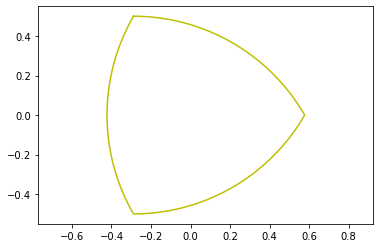

In [51]:
my_poly = relo_polygon.regular_polygon_Relo_from_module()
plt.plot(my_poly[:,0], my_poly[:,1], 'y-')
plt.axis('equal')